# Real Estate - Price Pridiction

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
housing['CHAS'].value_counts()

0    471
1     35
Name: CHAS, dtype: int64

In [6]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.286521,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702064,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.887000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
%matplotlib inline

In [8]:
import matplotlib.pyplot as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

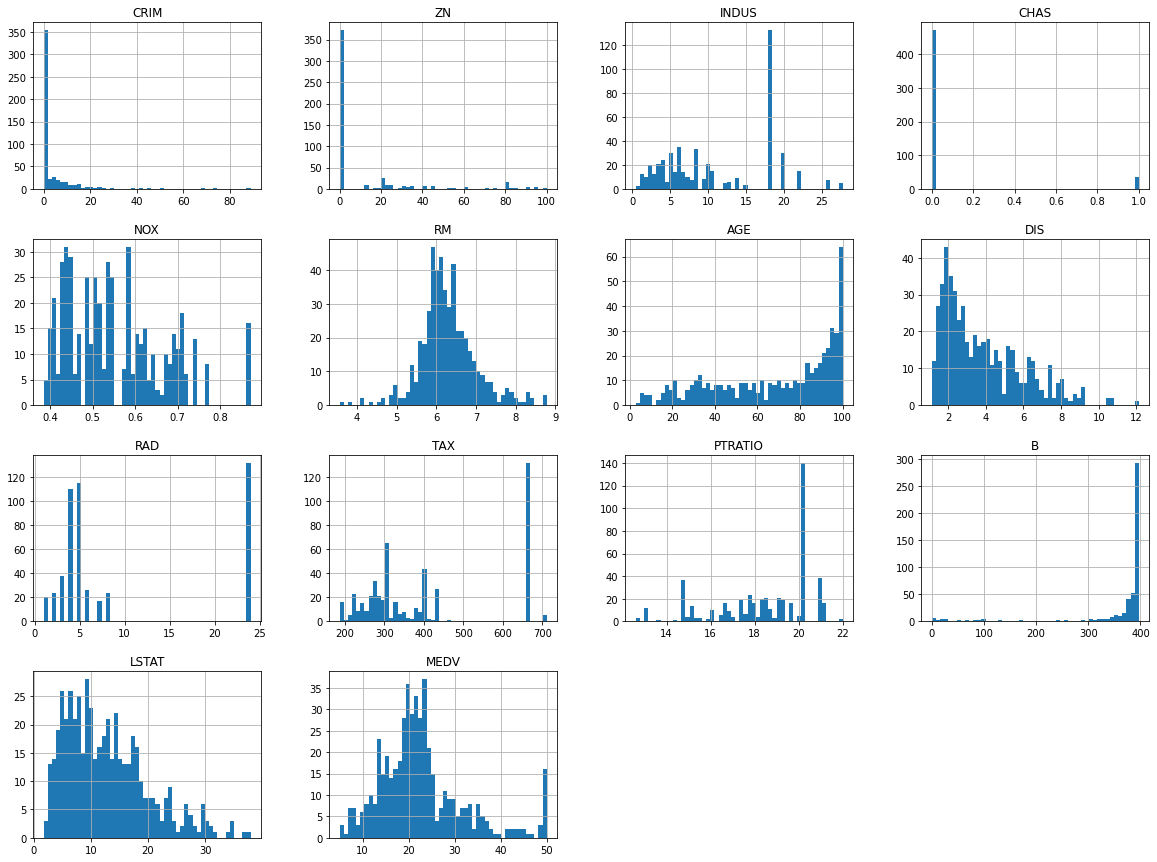

In [9]:
housing.hist(bins=50, figsize=(20,15))

In [10]:
#for learning purpose
import numpy as np 
def split_test_train(data, test_ratio): 
    np.random.seed(42)
    shuffled =np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]


split_test_train(housing, 0.2)

(         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS  RAD  TAX  \
 75    0.09512   0.0  12.83     0  0.4370  6.286  45.0  4.5026    5  398   
 477  15.02340   0.0  18.10     0  0.6140  5.304  97.3  2.1007   24  666   
 15    0.62739   0.0   8.14     0  0.5380  5.834  56.5  4.4986    4  307   
 332   0.03466  35.0   6.06     0  0.4379  6.031  23.3  6.6407    1  304   
 423   7.05042   0.0  18.10     0  0.6140  6.103  85.1  2.0218   24  666   
 ..        ...   ...    ...   ...     ...    ...   ...     ...  ...  ...   
 106   0.17120   0.0   8.56     0  0.5200  5.836  91.9  2.2110    5  384   
 270   0.29916  20.0   6.96     0  0.4640  5.856  42.1  4.4290    3  223   
 348   0.01501  80.0   2.01     0  0.4350  6.635  29.7  8.3440    4  280   
 435  11.16040   0.0  18.10     0  0.7400  6.629  94.6  2.1247   24  666   
 102   0.22876   0.0   8.56     0  0.5200  6.405  85.4  2.7147    5  384   
 
      PTRATIO       B  LSTAT  MEDV  
 75      18.7  383.23   8.94  21.4  
 477     20.

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
housing['TAXRM'] = housing['TAX']/housing['RM']

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [14]:
strat_train_set['CHAS'].value_counts()

0    376
1     28
Name: CHAS, dtype: int64

In [15]:
strat_test_set['CHAS'].value_counts()

0    95
1     7
Name: CHAS, dtype: int64

In [16]:
housing= strat_train_set

# Looking for Correlations

In [17]:
corr_matrix=housing.corr()

In [18]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679248
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525850
LSTAT     -0.740494
Name: MEDV, dtype: float64

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

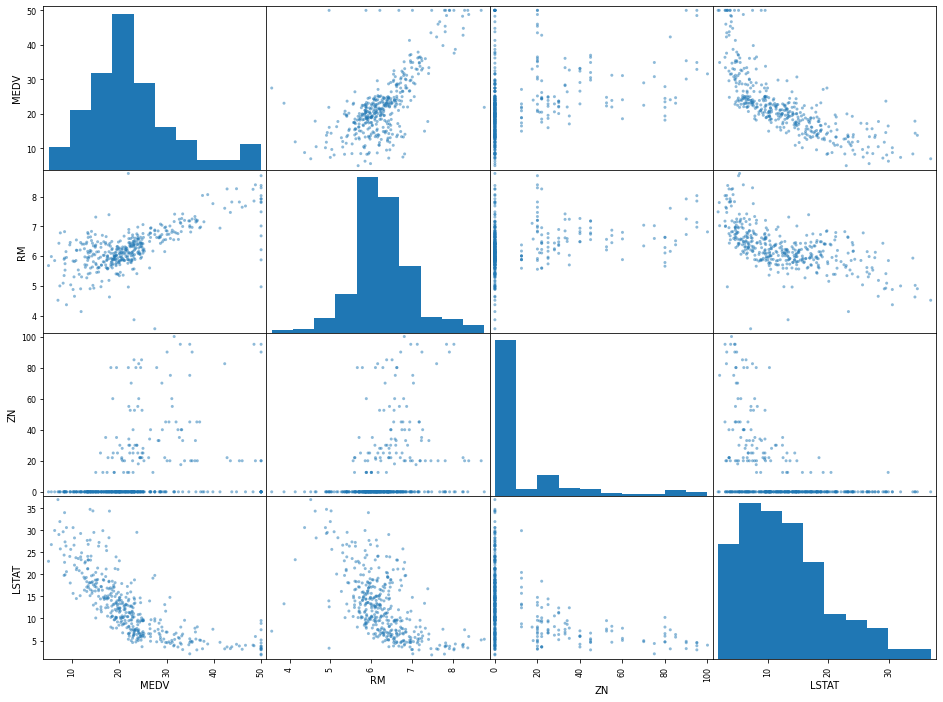

In [19]:
from pandas.plotting import scatter_matrix
attributes=['MEDV', 'RM','ZN', 'LSTAT']
scatter_matrix(housing[attributes], figsize=(16,12))

<AxesSubplot:xlabel='RM', ylabel='MEDV'>

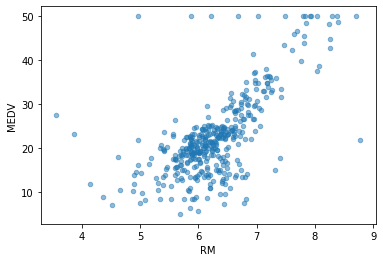

In [20]:
housing.plot(kind= 'scatter', x= 'RM', y='MEDV', alpha = 0.5)

# Trying out attribute combination

In [21]:
# housing['TAXRM'] = housing['TAX']/housing['RM']

In [22]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [23]:
corr_matrix = housing.corr()

In [24]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679248
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525850
LSTAT     -0.740494
Name: MEDV, dtype: float64

<AxesSubplot:xlabel='TAXRM', ylabel='MEDV'>

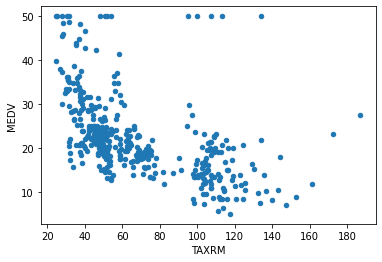

In [25]:
housing.plot(kind='scatter', x = 'TAXRM', y='MEDV')

In [26]:
housing= strat_train_set.drop('MEDV', axis =1)
housing_label = strat_train_set['MEDV'].copy()

# Misssing attribute

In [27]:
# How to deal with missing attributes:
#     1. get rid of datapoints
#     2. get rid of complete coloum/
#     3. assign some values(0, mean, median, mode)

In [28]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404 entries, 254 to 216
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       401 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  TAXRM    401 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 47.3 KB


In [29]:
a = housing.dropna(subset=['RM']) #option1
a.shape

(401, 14)

In [30]:
b = housing.drop('RM', axis=1) #option2
b.shape

(404, 13)

In [31]:
median = housing['RM'].median()
median

6.216

In [32]:
housing['RM'].fillna(median) #option3

254    6.108
348    6.635
476    6.484
321    6.376
326    6.312
       ...  
155    6.152
423    6.103
98     7.820
455    6.525
216    5.888
Name: RM, Length: 404, dtype: float64

In [33]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
impute.fit(housing)

SimpleImputer(strategy='median')

In [34]:
housing.shape

(404, 14)

In [35]:
impute.statistics_

array([2.86735000e-01, 0.00000000e+00, 9.90000000e+00, 0.00000000e+00,
       5.38000000e-01, 6.21600000e+00, 7.82000000e+01, 3.12220000e+00,
       5.00000000e+00, 3.37000000e+02, 1.90000000e+01, 3.90955000e+02,
       1.15700000e+01, 5.38502017e+01])

In [36]:
X=impute.transform(housing)

In [37]:
housing_tr = pd.DataFrame(X, columns=housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284436,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.371856
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.709432,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.466817
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.801475
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,53.850202
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.317507
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


# Scikit-learn Design 

Estimators
transformers
predictors

# Features Scalling

Primarily, two types. 
Min-Max Scalling (Normalization)
(value-min)/(max-min)
Skleqarn - MinMax scaler

Standardization
(value-mean)/std
Sklearn- Standard scaller


In [38]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,401.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.284948,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609,67.473015
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.712063,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740,31.562719
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000,24.645639
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.880000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500,44.783385
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.216000,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000,53.850202
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.631000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500,98.666667
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000,187.026116


# Creating a Pipeline

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
my_pipeline=Pipeline([('imputer', SimpleImputer(strategy='median')), ('std_scaler', StandardScaler())])

In [40]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [41]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ...,  0.41164221,
        -0.86091034, -0.5027435 ],
       [-0.44352175,  3.12628155, -1.35893781, ...,  0.39131918,
        -0.94116739, -0.80092671],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.44624347,
         0.81480158,  1.12456052],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ...,  0.41831233,
        -1.27603303, -1.02067877],
       [ 0.14210728, -0.4898311 ,  0.98336806, ..., -3.15239177,
         0.73869575,  1.10402433],
       [-0.43974024, -0.4898311 ,  0.37049623, ...,  0.41070422,
         0.09940681, -0.65218768]])

In [42]:
X_new = pd.DataFrame(housing_num_tr, columns=housing.columns)
X_new.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
count,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02,4.040000e+02
mean,5.716000e-17,-3.627461e-17,1.143200e-16,7.035077e-17,-1.055261e-16,9.217050e-16,-7.474769e-17,1.582892e-16,7.474769e-17,-8.354153e-17,-7.430800e-16,-4.781654e-16,-2.066554e-16,-1.319077e-16
std,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00,1.001240e+00
min,-4.445960e-01,-4.898311e-01,-1.543818e+00,-2.728884e-01,-1.448328e+00,-3.843654e+00,-2.343452e+00,-1.248110e+00,-1.001686e+00,-1.337627e+00,-2.573710e+00,-3.679748e+00,-1.530642e+00,-1.359502e+00
25%,-4.346270e-01,-4.898311e-01,-8.960085e-01,-2.728884e-01,-9.000550e-01,-5.665564e-01,-8.570894e-01,-8.157735e-01,-6.576668e-01,-7.618351e-01,-5.046855e-01,2.212050e-01,-8.225115e-01,-7.181650e-01
50%,-4.099313e-01,-4.898311e-01,-2.103490e-01,-2.728884e-01,-1.718802e-01,-9.658497e-02,3.245603e-01,-2.976495e-01,-5.429938e-01,-4.472273e-01,2.476870e-01,3.914755e-01,-1.690392e-01,-4.302443e-01
75%,1.596030e-02,7.518650e-02,9.833681e-01,-2.728884e-01,6.248287e-01,4.880566e-01,8.879256e-01,6.459421e-01,1.635794e+00,1.505715e+00,8.119664e-01,4.401987e-01,5.965162e-01,9.846570e-01
max,8.644855e+00,4.030310e+00,2.386714e+00,3.664502e+00,2.680852e+00,3.522054e+00,1.096973e+00,3.997357e+00,1.635794e+00,1.772835e+00,1.658385e+00,4.534347e-01,3.347050e+00,3.807269e+00


In [43]:
housing_label.describe()

count    404.000000
mean      22.509406
std        9.385531
min        5.000000
25%       16.600000
50%       21.150000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

# Selecting a desired model 

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = LinearRegression()
#model = DecisionTreeRegressor()
model.fit(housing_num_tr, housing_label)

RandomForestRegressor()

In [45]:
some_data = housing[:5]
some_label =housing_label[:5]

In [46]:
some_data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,45.468948


In [47]:
some_label

254    21.9
348    24.5
476    16.7
321    23.1
326    23.0
Name: MEDV, dtype: float64

In [48]:
prepared_data = my_pipeline.transform(some_data)
model.predict(prepared_data)

array([22.579, 25.489, 16.325, 23.632, 23.418])

In [49]:
list(some_label)

[21.9, 24.5, 16.7, 23.1, 23.0]

# Evaluating the Model

In [50]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
lin_mse= mean_squared_error(housing_label, housing_predictions)
lin_rmse= np.sqrt(lin_mse)
lin_mse

1.3899528341584155

In [51]:
# x_new = np.linspace(0, 9, 404)
# fig, axs = plt.subplots(figsize=(20,20), sharey=True)
# plt.title('Testplot')
# axs.scatter(housing['RM'], housing_label)
# plt.plot(x_new, housing_predictions)

   # Using better evaluation techniques - CROSS VALIDATION

In [52]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_label, scoring='neg_mean_squared_error', cv=10)

rmse_scores= np.sqrt(-scores)

In [53]:
rmse_scores

array([2.84092052, 2.95894831, 4.35969582, 2.64134454, 3.33273307,
       2.53925351, 4.70760906, 3.28111094, 3.30728896, 3.264253  ])

In [54]:
def print_scores(scores):
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())
print_scores(rmse_scores)

Scores: [2.84092052 2.95894831 4.35969582 2.64134454 3.33273307 2.53925351
 4.70760906 3.28111094 3.30728896 3.264253  ]
Mean: 3.3233157734179857
Standard Deviation: 0.6664288370458882


# Model Dump

In [55]:
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

# Testing the model on test Dataset

In [56]:
X_test = strat_test_set.drop('MEDV', axis =1)
Y_test = strat_test_set['MEDV'].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [59]:
print_scores(final_rmse)

Scores: 3.172311999404948
Mean: 3.172311999404948
Standard Deviation: 0.0
